# Energy consumption prediction

In [1]:
#importing required libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
#importing the Train dataset into IDE
train_data=pd.read_csv("E:\\DATA-SETS\\energy consumption\\train_energy_data.csv")

In [4]:
#First five records of the dataset
train_data.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17


In [6]:
#count of total records and features in train data
print("Total records in train data:",train_data.shape[0])
print("Total features in train data:",train_data.shape[1])

Total records in train data: 1000
Total features in train data: 7


In [7]:
#information about the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


In [8]:
#checking null values in dataset
train_data.isnull().sum()

Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

In [35]:
train_data.describe()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
count,1000.000000,1000.000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.011000,25462.388,48.372000,25.606000,22.611390,0.493000,4166.252570
std,0.826778,14294.554,29.061972,14.105166,7.139943,0.500201,933.313064
min,0.000000,560.000,1.000000,1.000000,10.050000,0.000000,1683.950000
25%,0.000000,13169.750,22.000000,13.000000,16.475000,0.000000,3509.482500
50%,1.000000,25477.000,47.000000,26.000000,22.815000,0.000000,4175.730000
75%,2.000000,37446.250,73.250000,38.000000,28.850000,1.000000,4863.850000
max,2.000000,49997.000,99.000000,49.000000,34.990000,1.000000,6530.600000


In [9]:
#importing the Test dataset into IDE
test_data=pd.read_csv("E:\\DATA-SETS\\energy consumption\\test_energy_data.csv")

In [16]:
#count of total records and features in train data
print("Total records in test data  :",test_data.shape[0])
print("Total features in test data :",test_data.shape[1])

Total records in test data  : 100
Total features in test data : 7


In [17]:
#checking null values in dataset
test_data.isnull().sum()

Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

In [18]:
#columns in dataset
train_data.columns

Index(['Building Type', 'Square Footage', 'Number of Occupants',
       'Appliances Used', 'Average Temperature', 'Day of Week',
       'Energy Consumption'],
      dtype='object')

In [19]:
#encode categorical data into numeric
from sklearn.preprocessing import LabelEncoder

In [20]:
le=LabelEncoder()

In [113]:
#encoding categorical data into numeric
train_data[train_data.select_dtypes(include=["object"]).columns]=train_data[train_data.select_dtypes(include=["object"]).columns].apply(le.fit_transform)

In [112]:
#encoding categorical data into numeric
test_data[test_data.select_dtypes(include=["object"]).columns]=test_data[test_data.select_dtypes(include=["object"]).columns].apply(le.fit_transform)

In [23]:
train_data.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,2,7063,76,10,29.84,0,2713.95
1,0,44372,66,45,16.72,0,5744.99
2,1,19255,37,17,14.30,1,4101.24
3,2,13265,14,41,32.82,0,3009.14
4,0,13375,26,18,11.92,0,3279.17


In [24]:
test_data.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,2,24563,15,4,28.52,0,2865.57
1,0,27583,56,23,23.07,1,4283.80
2,0,45313,4,44,33.56,0,5067.83
3,2,41625,84,17,27.39,1,4624.30
4,2,36720,58,47,17.08,0,4820.59


In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   int32  
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   int32  
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 47.0 KB


In [26]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        100 non-null    int32  
 1   Square Footage       100 non-null    int64  
 2   Number of Occupants  100 non-null    int64  
 3   Appliances Used      100 non-null    int64  
 4   Average Temperature  100 non-null    float64
 5   Day of Week          100 non-null    int32  
 6   Energy Consumption   100 non-null    float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 4.8 KB


In [30]:
#corelation between the features
train_data.corr()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
Building Type,1.000000,0.041292,-0.002462,-0.025035,0.038325,-0.025229,-0.202358
Square Footage,0.041292,1.000000,0.033379,-0.013478,0.027273,0.011354,0.774873
Number of Occupants,-0.002462,0.033379,1.000000,0.023646,0.014122,0.014296,0.354485
Appliances Used,-0.025035,-0.013478,0.023646,1.000000,-0.062870,-0.009046,0.312792
Average Temperature,0.038325,0.027273,0.014122,-0.062870,1.000000,-0.011106,-0.034487
Day of Week,-0.025229,0.011354,0.014296,-0.009046,-0.011106,1.000000,-0.004393
Energy Consumption,-0.202358,0.774873,0.354485,0.312792,-0.034487,-0.004393,1.000000


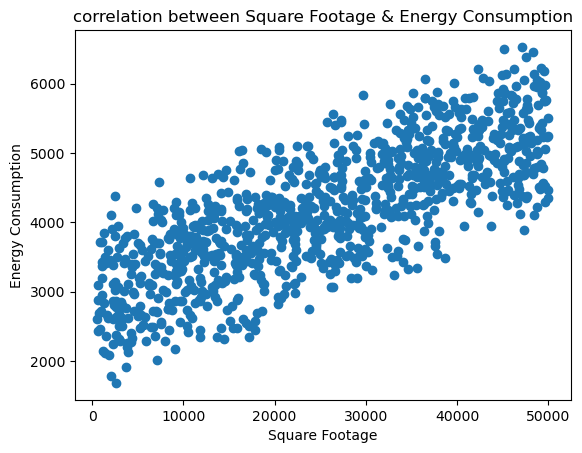

In [34]:
plt.scatter(train_data["Square Footage"],train_data["Energy Consumption"])
plt.title("correlation between Square Footage & Energy Consumption")
plt.xlabel("Square Footage")
plt.ylabel("Energy Consumption")
plt.show()

In [38]:
#splitting train dataset into x_varaible and y_variables 
train_data_x=train_data.iloc[:,:6]
train_data_y=train_data["Energy Consumption"]

In [42]:
#dimension of dataset after split
print(train_data_x.shape,train_data_y.shape)

(1000, 6) (1000,)


In [39]:
#splitting test dataset into x_varaible and y_variables 
test_data_x=test_data.iloc[:,:6]
test_data_y=test_data["Energy Consumption"]

In [43]:
#dimension of dataset after split
print(test_data_x.shape,test_data_y.shape)

(100, 6) (100,)


In [36]:
#import lLinearRegression for train the model
from sklearn.linear_model import LinearRegression

In [37]:
lin_reg=LinearRegression()

In [44]:
#model training
lin_reg.fit(train_data_x,train_data_y)

LinearRegression()

In [55]:
#slope and intercept
print("slope:",lin_reg.coef_[0])
print("intercept:",lin_reg.intercept_)

slope: -254.33332373939083
intercept: 2223.437706045378


In [109]:
print("Rsquare Train:",lin_reg.score(train_data_x,train_data_y))
print("Rsquare Test:",lin_reg.score(test_data_x,test_data_y))

Rsquare Train: 0.860435189173233
Rsquare Test: 0.8141864738600042


In [88]:
#Prediction for train and test
train_prediction=lin_reg.predict(train_data_x)
test_predcition=lin_reg.predict(test_data_x)

In [79]:
#ERROR Calculation for train and test
error_train= train_data_y - train_prediction
error_test= test_data_y - test_predcition

In [104]:
mse_train=np.mean(np.sum(train_data_y-train_prediction))
print("mean squared error train:",mse_train)
mse_test=np.mean(np.square(test_data_y-test_predcition))
print("mean squared error test:",mse_test)

mean squared error train: 3.1377567211166024e-10
mean squared error test: 127509.76507879289


In [108]:
rsme_train=np.sqrt(mse_train)
print("RSME Train:",rsme_train)
rsme_test=np.sqrt(mse_test)
print("RSME Test:",rsme_test)

RSME Train: 1.7713714238173208e-05
RSME Test: 357.08509501068914


In [110]:
#percentage error in test 
mape=np.mean(np.abs(error_test*100/test_data_y))
print("Mean absolute percentage error:",mape)

Mean absolute percentage error: 8.01464320002798


In [82]:
#creating a dataframe for actual and predicted train data
actual_predict_train=pd.DataFrame()

In [84]:
actual_predict_train["actual"]=train_data_y
actual_predict_train["predicted"]=train_prediction

In [85]:
actual_predict_train.head()

,actual,predicted
0,2713.95,2935.229431
1,5744.99,6006.225174
2,4101.24,3576.147766
3,3009.14,3229.306524
4,3279.17,3487.807146


In [86]:
actual_predict_test=pd.DataFrame()

In [111]:
#creating a dataframe for actual and predicted test data
actual_predict_test["actual"]=test_data_y
actual_predict_test["predicted"]=test_predcition

In [91]:
actual_predict_test.head()

,actual,predicted
0,2865.57,3078.747141
1,4283.80,4534.964641
2,5067.83,5322.154456
3,4624.30,4888.708180
4,4820.59,5065.127362


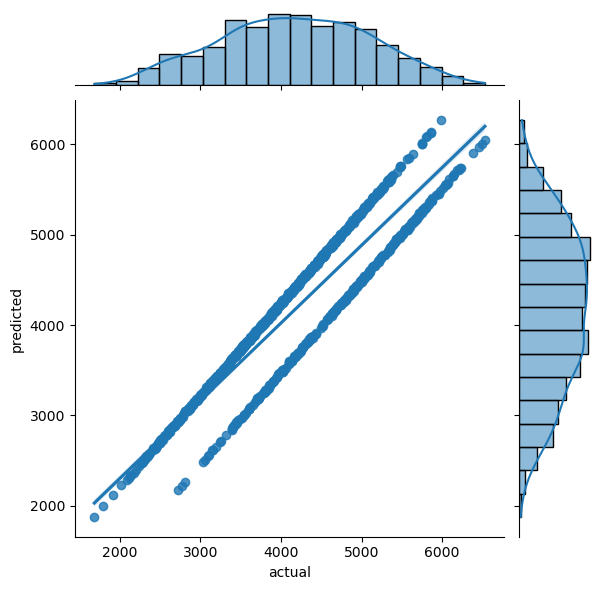

In [101]:
sns.jointplot(x="actual",y="predicted",data=actual_predict_train,kind="reg")
plt.show()

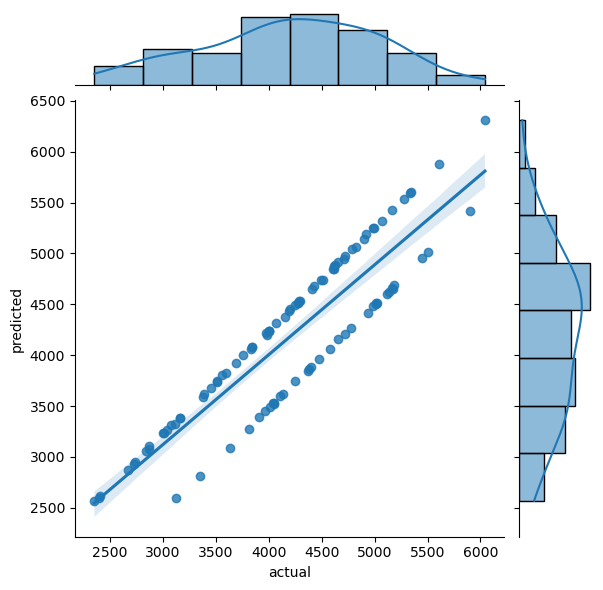

In [103]:
sns.jointplot(x="actual",y="predicted",data=actual_predict_test,kind="reg")
plt.show()